In [1]:
import pandas as pd

# read in data
df = pd.read_csv('data/5guys_flight_data_preprocessed.csv')

# Train

C:\Users\jcmuf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\jcmuf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\jcmuf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)`

Scores for each fold: [0.64985495 0.66971449 0.66168655 0.66229392 0.65785717]
Mean f1 score: 0.660


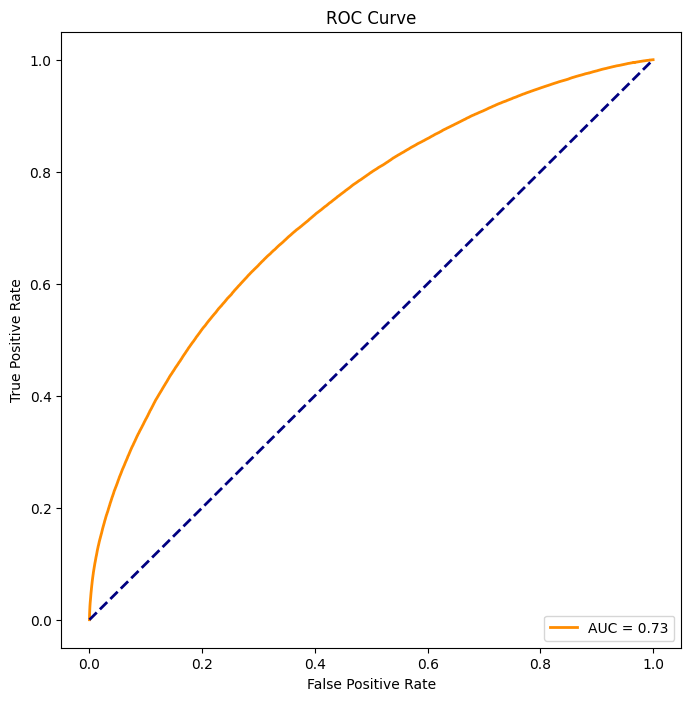

Accuracy: 0.6789949082471664
Confusion Matrix:
[[302320 138091]
 [ 36226  66398]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.69      0.78    440411
         1.0       0.32      0.65      0.43    102624

    accuracy                           0.68    543035
   macro avg       0.61      0.67      0.60    543035
weighted avg       0.79      0.68      0.71    543035



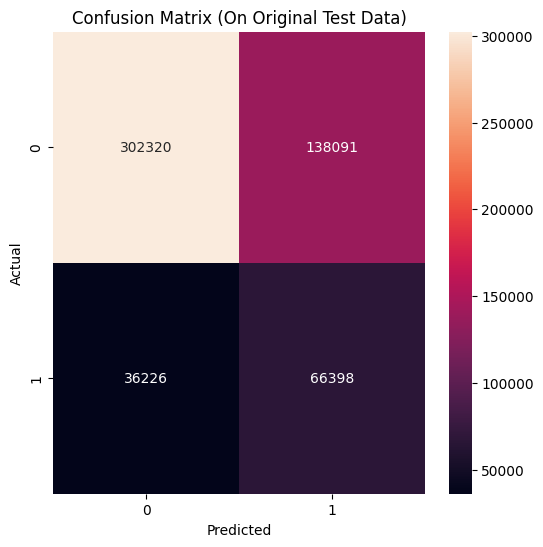

In [2]:

import pandas as pd

# read in data
df = pd.read_csv('data/5guys_flight_data_preprocessed.csv')
Train
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
import seaborn as sns

# Select all columns as features except the target column
features = df.columns.tolist()
features.remove('DEP_DEL15')

# target feature
target = 'DEP_DEL15'

# Split the dataset into training and testing sets
X = df[features]
y = df[target]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=55555, stratify=y)

# Perform undersampling on the training data only
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=55555)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

from sklearn.neural_network import MLPClassifier

# Create an instance of MLPClassifier with non-default parameters
model = MLPClassifier(hidden_layer_sizes=(100, 100), activation='relu', solver='adam', random_state=55555, max_iter=202, alpha=0.001)

# Perform cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=55555)
scores = cross_val_score(model, X_train_scaled, y_train_resampled, cv=cv, scoring='f1')

# Print the mean of the cross validation scores
print(f'Scores for each fold: {scores}')
print(f'Mean f1 score: {scores.mean():.3f}')

# Train classifier
model.fit(X_train_scaled, y_train_resampled)

# Predict on test data
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# Calculate the ROC curve points
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Display metrics
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(confusion)
print('Classification Report:')
print(report)

# Confusion matrix
import seaborn as sns
plt.figure(figsize=(6, 6))
sns.heatmap(confusion, annot=True, cmap='rocket', fmt='g', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (On Original Test Data)')
plt.show()